In [ ]:
Высокая цель: уменьшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 

# Ksenia
# 14.01.24
# v.01


In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import re
import string
from collections import Counter
import gc

import spacy 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file_path = 'dorian gray.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()


In [ ]:
file_path = 'dorian gray.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        print(line)


In [9]:
# Для векторизации с помощью spaCy нужна большая модель, 
# устанавливается через Anaconda Prompt: 
# python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [10]:
len(spacy.lang.en.stop_words.STOP_WORDS)

326

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def preproc(filename):
    '''
    Функция принимает название файла filename и возвращает:
    - список слов после удаления пунктуации и стоп-слов, лемматизации;
    - словарь уникальных слов (keys) и их частоту (values) с тексте.
    '''    
    with open(file_path, 'r', encoding='utf-8') as file:
      content = file.read()
    
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuations = string.punctuation

    doc = nlp(content)

    content_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]
    
    content_clear = [word for word in content_lemm if 
                  word not in stop_words and 
                  word not in punctuations]
    
    count_words = Counter(content_clear)
    
    print('Количество слов в тексте: '
          '{}.'.format(len(content_clear)))
    print('Количество уникальных слов в тексте: '
          '{}.\n'.format(len(count_words)))
    
    return content_clear, count_words

In [14]:
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
doc = nlp(content)

In [15]:
doc = nlp(content)

In [16]:
content_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]

In [17]:
content_lemm

['',
 'the',
 'picture',
 'of',
 'dorian',
 'gray',
 '',
 'by',
 '',
 'oscar',
 'wilde',
 '',
 'the',
 'preface',
 '',
 'the',
 'artist',
 'be',
 'the',
 'creator',
 'of',
 'beautiful',
 'thing',
 '.',
 'to',
 'reveal',
 'art',
 'and',
 'conceal',
 '',
 'the',
 'artist',
 'be',
 'art',
 "'s",
 'aim',
 '.',
 'the',
 'critic',
 'be',
 'he',
 'who',
 'can',
 'translate',
 'into',
 'another',
 '',
 'manner',
 'or',
 'a',
 'new',
 'material',
 'his',
 'impression',
 'of',
 'beautiful',
 'thing',
 '.',
 '',
 'the',
 'high',
 ',',
 'as',
 'the',
 'low',
 ',',
 'form',
 'of',
 'criticism',
 'be',
 'a',
 'mode',
 'of',
 '',
 'autobiography',
 '.',
 '',
 'those',
 'who',
 'find',
 'ugly',
 'meaning',
 'in',
 'beautiful',
 'thing',
 'be',
 'corrupt',
 'without',
 '',
 'be',
 'charming',
 '.',
 'this',
 'be',
 'a',
 'fault',
 '.',
 '',
 'those',
 'who',
 'find',
 'beautiful',
 'meaning',
 'in',
 'beautiful',
 'thing',
 'be',
 'the',
 '',
 'cultivate',
 '.',
 'for',
 'these',
 'there',
 'be',
 'hop

In [18]:
len(content_lemm)

103801

In [20]:
my_text, count_words = preproc('dorian gray.txt')

Количество слов в тексте: 31147.
Количество уникальных слов в тексте: 5125.



In [21]:
my_text

['picture',
 'dorian',
 'gray',
 'oscar',
 'wilde',
 'preface',
 'artist',
 'creator',
 'beautiful',
 'thing',
 'reveal',
 'art',
 'conceal',
 'artist',
 'art',
 'aim',
 'critic',
 'translate',
 'manner',
 'new',
 'material',
 'impression',
 'beautiful',
 'thing',
 'high',
 'low',
 'form',
 'criticism',
 'mode',
 'autobiography',
 'find',
 'ugly',
 'meaning',
 'beautiful',
 'thing',
 'corrupt',
 'charming',
 'fault',
 'find',
 'beautiful',
 'meaning',
 'beautiful',
 'thing',
 'cultivate',
 'hope',
 'elect',
 'beautiful',
 'thing',
 'mean',
 'beauty',
 'thing',
 'moral',
 'immoral',
 'book',
 'book',
 'write',
 'badly',
 'write',
 'nineteenth',
 'century',
 'dislike',
 'realism',
 'rage',
 'caliban',
 'face',
 'glass',
 'nineteenth',
 'century',
 'dislike',
 'romanticism',
 'rage',
 'caliban',
 'face',
 'glass',
 'moral',
 'life',
 'man',
 'form',
 'subject',
 'matter',
 'artist',
 'morality',
 'art',
 'consist',
 'perfect',
 'use',
 'imperfect',
 'medium',
 'artist',
 'desire',
 'prove

In [22]:
def get_word_vectors(words):
    '''
    Функция конвертирует список слов в их векторное представление
    '''
    ar = []
    for i in words:
        ar.append(nlp(i).vector)
    return ar

word_vector_list = get_word_vectors(my_text)


In [23]:
word_vector_list

[array([ 1.4843e+00, -3.2600e-01, -4.5521e+00, -3.0204e+00, -8.5583e-01,
        -1.2147e-01,  5.6240e+00,  9.7522e-01, -2.2317e+00,  1.2683e+00,
         8.2342e+00,  2.1149e+00, -4.0717e+00, -9.4154e-01,  2.0627e+00,
         4.3739e-01,  2.1907e+00,  9.3721e-02, -6.8302e-01, -8.0782e-01,
        -2.3752e+00,  9.1845e-01, -2.5341e+00, -1.1263e+00, -3.9660e+00,
         1.6992e+00, -2.3466e+00, -2.8465e+00,  1.9245e+00,  1.0434e+00,
        -6.1999e-02,  1.5223e-01, -1.8970e-01,  4.5309e-01,  4.1366e-03,
        -1.4022e+00, -1.0087e+00,  2.4111e+00,  5.6228e-02, -8.7888e-01,
         1.4983e+00, -2.5518e+00,  2.5161e-01,  1.0611e+00,  3.4003e-01,
         3.7227e+00, -8.3816e-01, -3.1757e+00,  8.9152e-01,  5.3004e-01,
         1.4081e+00,  7.8575e-01,  9.1791e-01, -3.2105e+00,  1.5826e+00,
        -6.7313e-01, -2.2042e+00,  2.3944e+00,  2.8384e+00, -1.7157e+00,
         1.1604e+00,  7.8732e-01, -1.4939e-01,  1.0779e+00, -2.9742e+00,
         4.2887e+00, -3.1833e+00, -6.0461e+00,  1.3

In [ ]:
3. Понижение размерности текстовых данных.

In [24]:
# Применение TF-IDF для векторизации текста
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(my_text)

In [32]:
# Применение PCA для снижения размерности
pca = PCA(n_components=100)
text_embeddings_pca = pca.fit_transform(tfidf_matrix.toarray())

In [33]:
# text_embeddings_pca теперь содержит векторы текстовых данных с уменьшенной размерностью
print(text_embeddings_pca)

[[-1.34116891e-02 -4.31733683e-03 -6.71362886e-03 ...  2.58794343e-03
   1.93433292e-03  1.50424428e-03]
 [ 9.87086197e-01  5.54656432e-03  8.19804730e-03 ...  1.84157041e-04
   1.87247822e-04  1.18497886e-04]
 [-2.13402866e-02 -1.24118642e-02 -2.01641216e-02 ...  4.37044497e-04
   4.39840405e-04  2.78543010e-04]
 ...
 [-1.13680228e-02 -3.28172906e-03 -5.07545408e-03 ... -2.33937880e-03
  -2.26884097e-03 -1.55069466e-03]
 [-1.11416544e-02 -3.18002209e-03 -4.91552769e-03 ... -1.76900083e-03
  -1.84566245e-03 -1.16594953e-03]
 [-1.18809735e-02 -3.52108944e-03 -5.45230404e-03 ... -1.20228310e-02
   5.52507355e-03 -1.39135578e-02]]


In [ ]:
4. Построить график объема информации.

In [34]:
# text_embeddings_pca содержит векторы с уменьшенной размерностью
# Получение объема информации для каждой компоненты PCA
explained_variance_ratio = pca.explained_variance_ratio_

In [35]:
explained_variance_ratio

array([0.0132985 , 0.00864878, 0.00851139, 0.00820009, 0.00806159,
       0.00806159, 0.00803806, 0.00788965, 0.00771504, 0.00749913,
       0.00655046, 0.0064488 , 0.00613811, 0.00566418, 0.00509874,
       0.0050192 , 0.00455632, 0.00432578, 0.00425546, 0.00397482,
       0.00393914, 0.0038851 , 0.00386824, 0.00382318, 0.00358364,
       0.00348885, 0.00345143, 0.00326995, 0.00326142, 0.00324289,
       0.00322505, 0.0031917 , 0.00313241, 0.00309855, 0.00306128,
       0.0029384 , 0.00281663, 0.00281659, 0.00280051, 0.0027519 ,
       0.0027389 , 0.00268244, 0.00265453, 0.00264606, 0.00262232,
       0.0026222 , 0.0025989 , 0.00255066, 0.00251808, 0.00248583,
       0.00245322, 0.00241957, 0.00235768, 0.00232561, 0.0022937 ,
       0.00226531, 0.00226518, 0.00225277, 0.00223198, 0.00221827,
       0.00217027, 0.00212901, 0.00209615, 0.00206971, 0.00206633,
       0.00205388, 0.00199589, 0.00196051, 0.00192625, 0.00190166,
       0.00189841, 0.00188541, 0.00186967, 0.00186334, 0.00185

In [36]:
# Кумулятивная сумма для объема информации
cumulative_variance = np.cumsum(explained_variance_ratio)

In [37]:
cumulative_variance

array([0.0132985 , 0.02194728, 0.03045867, 0.03865876, 0.04672035,
       0.05478194, 0.06282   , 0.07070964, 0.07842468, 0.08592382,
       0.09247428, 0.09892308, 0.10506119, 0.11072537, 0.11582411,
       0.12084331, 0.12539963, 0.12972541, 0.13398087, 0.13795569,
       0.14189483, 0.14577993, 0.14964817, 0.15347135, 0.157055  ,
       0.16054385, 0.16399528, 0.16726523, 0.17052665, 0.17376955,
       0.1769946 , 0.1801863 , 0.18331871, 0.18641726, 0.18947854,
       0.19241695, 0.19523358, 0.19805017, 0.20085069, 0.20360258,
       0.20634148, 0.20902392, 0.21167845, 0.21432451, 0.21694683,
       0.21956903, 0.22216793, 0.2247186 , 0.22723667, 0.22972251,
       0.23217573, 0.2345953 , 0.23695297, 0.23927858, 0.24157228,
       0.2438376 , 0.24610277, 0.24835554, 0.25058753, 0.2528058 ,
       0.25497607, 0.25710507, 0.25920122, 0.26127093, 0.26333726,
       0.26539114, 0.26738703, 0.26934754, 0.2712738 , 0.27317546,
       0.27507387, 0.27695928, 0.27882895, 0.28069229, 0.28254

Text(0.5, 0, 'Количество компонент PCA')

Text(0, 0.5, 'Кумулятивная доля объясненной дисперсии')

Text(0.5, 1.0, 'График объема информации')

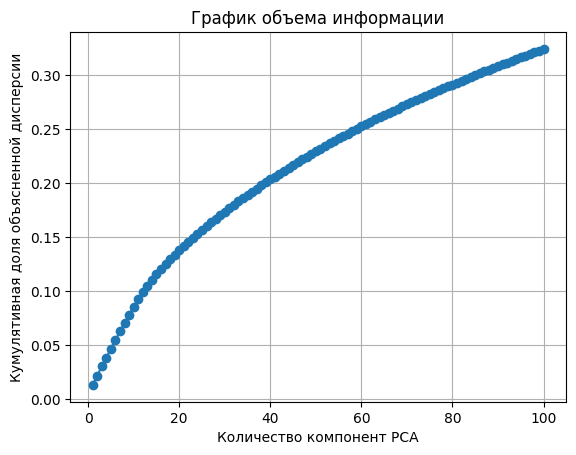

In [38]:
# Построение графика
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Количество компонент PCA')
plt.ylabel('Кумулятивная доля объясненной дисперсии')
plt.title('График объема информации')
plt.grid(True)
plt.show()

In [ ]:
Вывод: при увеличении количества компонентов PCA - увеличивается доля объясненной дисперсии.  
Зафиксированные точки на графике предоставляют информацию о том, какое количество компонент PCA достаточно для сохранения определенного уровня объема информации
(в данном графике: 90 компонент соответвует 90 %)
При снижении количества компонент - линейно снижается объем информации.